# Набор данных

**Оценка стоимости  и типа трансмиссии по данным продаж автомобилей на вторичном рынке Молдавии**

Набор данных представляет собой статистику параметров автомобилей на вторичном рынке в Молдавии.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

 Также среди параметров есть целевой для задачи классификации - тип трансмиссии.

 Последняя задача может быть рассмотрена, например, как пример задачи на заполнение пропусков (если продавец не указал соответствующий параметр).

# Import библиотек

In [ ]:
import pandas as pd

from google.colab import files

# Загрузка данных на Google Drive

In [ ]:
uploaded = files.upload()

# Считываем файл в DataFrame



метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars.csv', delimiter = ',')

In [ ]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Информация о DataFrame


Метод .info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB


# Поиск Дубликатов



методы .duplicated() и .sum()

In [ ]:
df.duplicated().sum()

3743

**Удаление дубликатов**

Методы .drop_duplicates() и .reset_index()

In [ ]:
DF = df.drop_duplicates()

DF = DF.reset_index(drop=True)

DF

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Индексация

**Визуализация части DataFrame**

Метод .head(n) - первые n строк

In [ ]:
DF.head(6)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0


Метод .tail(n) - последние n строк

In [ ]:
DF.tail(9)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
37255,Renault,Megane,2011,Sedan,145000.0,1500.0,Diesel,Automatic,6200.0
37256,Toyota,Auris,2007,Hatchback,222111.0,1400.0,Diesel,Automatic,4444.0
37257,Skoda,Superb,2016,Cabriolet,78900.0,2000.0,Petrol,Automatic,21000.0
37258,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0
37263,Renault,Grand Scenic,2006,Minivan,300000.0,1500.0,Diesel,Manual,4000.0


**Индексация**

аттрибут .loc[строки, столбцы]

In [ ]:
DF.loc[1437,'Transmission']

'Automatic'

In [ ]:
DF.loc[:,'Transmission']

,Transmission
0,Automatic
1,Manual
2,Manual
3,Manual
4,Manual
...,...
37259,Manual
37260,Manual
37261,Manual
37262,Manual


In [ ]:
DF.loc[:,['Transmission']].head(5)

,Transmission
0,Automatic
1,Manual
2,Manual
3,Manual
4,Manual


In [ ]:
DF.loc[:,['Transmission','Year']].head(5)

,Transmission,Year
0,Automatic,2011
1,Manual,2014
2,Manual,1998
3,Manual,2012
4,Manual,2006


In [ ]:
DF.loc[:,'Make':'Style'].head(5)

,Make,Model,Year,Style
0,Toyota,Prius,2011,Hatchback
1,Renault,Grand Scenic,2014,Universal
2,Volkswagen,Golf,1998,Hatchback
3,Renault,Laguna,2012,Universal
4,Opel,Astra,2006,Universal


In [ ]:
DF.loc[69,:]

Make                        Honda
Model                        CR-V
Year                         2002
Style                   Universal
Distance                   275100
Engine_capacity(cm3)         2000
Fuel_type                  Petrol
Transmission               Manual
Price(euro)                  5900
Name: 69, dtype: object

In [ ]:
DF.loc[69:69,:]

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
69,Honda,CR-V,2002,Universal,275100.0,2000.0,Petrol,Manual,5900.0


In [ ]:
DF.loc[322:1437,:]

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
322,Skoda,Octavia,2010,Universal,1.0,1400.0,Petrol,Manual,5350.0
323,Mercedes,E Class,2016,Sedan,161024.0,2200.0,Diesel,Automatic,26950.0
324,Honda,Civic,2006,Hatchback,195000.0,1400.0,Petrol,Manual,5400.0
325,Ford,Fusion,2015,Sedan,124000.0,2000.0,Plug-in Hybrid,Automatic,11499.0
326,Ford,Fusion,2003,Hatchback,330000.0,1400.0,Diesel,Automatic,4100.0
...,...,...,...,...,...,...,...,...,...
1433,Peugeot,208,2013,Hatchback,154000.0,1400.0,Diesel,Automatic,6999.0
1434,Infiniti,QX30,2017,SUV,91000.0,1500.0,Diesel,Automatic,15490.0
1435,Ford,Kuga,2016,SUV,102500.0,1500.0,Diesel,Manual,14490.0
1436,Ford,Kuga,2018,SUV,122100.0,1500.0,Diesel,Manual,14250.0


In [ ]:
DF.loc[227:229,'Make':'Fuel_type']

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type
227,Opel,Calibra,1992,Coupe,400000.0,2000.0,Metan/Propan
228,Renault,Kadjar,2016,Crossover,150425.0,1500.0,Diesel
229,Ford,Fusion,2018,Sedan,105000.0,2000.0,Hybrid


**Логическое Индексирование**

In [ ]:
DF[DF['Transmission']=='Manual']

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


# Сортировка DataFrame



Метод .sort_values(by)

In [ ]:
DF.sort_values(by = 'Price(euro)').tail(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
13131,Toyota,Land Cruiser Prado,2012,SUV,10005.0,3000.0,Diesel,Automatic,200000.0
14834,Volkswagen,Caddy,2015,Combi,158260.0,1395.0,Metan/Propan,Manual,200000.0
29132,Mercedes,G Class,2020,SUV,3000.0,3982.0,Petrol,Automatic,215000.0
17849,KIA,Sportage,2018,Crossover,46000.0,1600.0,Petrol,Automatic,490000.0
33677,Brilliance,BS3,2009,Sedan,57000.0,1598.0,Petrol,Manual,10000000.0



Метод .sort_values(by, ascending= False)

In [ ]:
DF.sort_values(by = 'Year', ascending= False).head(5)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
29164,Audi,A5,2021,Sedan,661.0,2000.0,Petrol,Automatic,32200.0
32583,Mercedes,GLS Klass,2021,SUV,0.0,3000.0,Diesel,Automatic,107528.0
15611,Volkswagen,Polo,2021,Universal,280000.0,1400.0,Petrol,Manual,1900.0
6044,Skoda,Superb,2021,Sedan,0.0,1500.0,Petrol,Automatic,30000.0
11840,Toyota,Corolla,2021,Universal,288.0,1987.0,Hybrid,Automatic,23000.0


# Сохранение DataFrame в файл


Метод .to_csv(path, index)

In [ ]:
DF.to_csv('/content/cars_moldova_no_dup.csv',index=False)

# Контрольные вопросы

1.Допустим, у вас есть файл с данными, который называется ‘iris.csv’. Этот файл находится в папке ‘/data/’. Вы открываете его в текстовом редакторе и видите следующие первые строки:

sepal length in cm; sepal width in cm; petal length in

cm; petal width in cm; class

5.1; 3.5; 1.4; 0.2; 0

Как должна выглядеть команда для считывания данных в датафрейм Pandas?

Для считывания файла с разделителем ; в датафрейм Pandas, можно использовать следующую команду:

In [1]:
import pandas as pd

df = pd.read_csv('/data/iris.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: '/data/iris.csv'

2.Для набора данных Cars после удаления дубликатов выберите из полного датафрейма строки с индекса 69 по 322. Отсортируйте полученный датафрейм по колонке ‘Distance’ по убыванию. Какое значение колонки ‘Style’ у полученного датафрейма во второй строке сверху?

Пример кода для выполнения этих действий:

In [ ]:
import pandas as pd

# Чтение данных из CSV-файла
df = pd.read_csv('cars.csv')

# Удаление дубликатов
df = df.drop_duplicates()

# Выбор строк с индекса 69 по 322 (включительно)
subset_df = df.iloc[69:323]

# Сортировка по колонке 'Distance' по убыванию
sorted_df = subset_df.sort_values(by='Distance', ascending=False)

# Получение значения из колонки 'Style' во второй строке сверху
second_row_style = sorted_df.iloc[1]['Style']

# Вывод результата
print(f"Значение колонки 'Style' во второй строке сверху: {second_row_style}")

3.Для набора данных Cars оцените количество строк, которые были удалены после анализа гистограмм распределения и удаления аномальных значений.

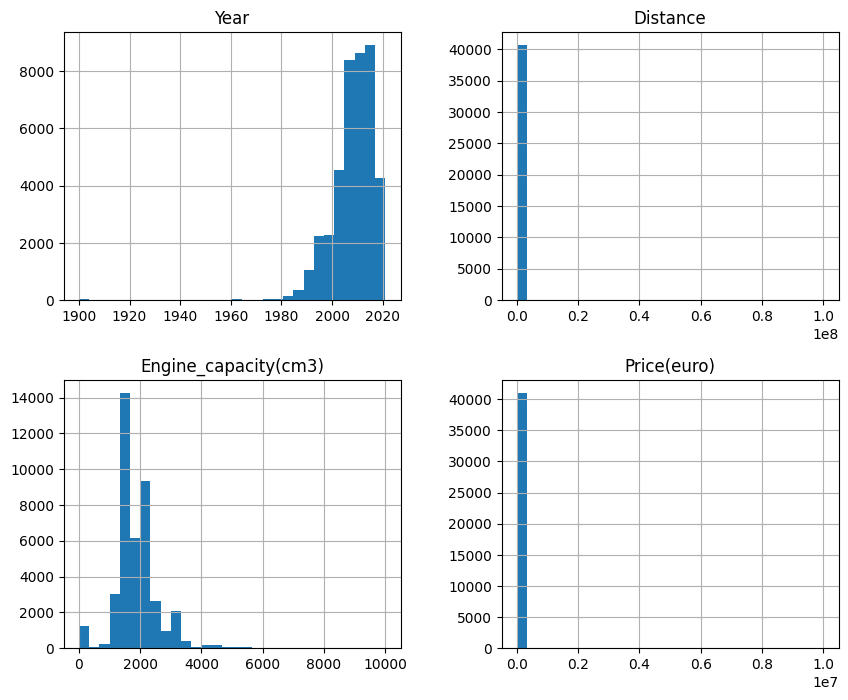

Количество удалённых строк: 1046


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Чтение данных из CSV-файла
df = pd.read_csv('cars.csv')

# 2. Построение гистограмм для визуального анализа распределений
df.hist(bins=30, figsize=(10, 8))
plt.show() #plt.show() — отображает построенные графики с использованием библиотеки matplotlib.pyplot

# 3. Удаление аномальных значений
# Пример: допустим, что аномальные значения - это значения, которые находятся за пределами 3 стандартных отклонений
# Вычисляем границы для удаления аномалий для каждого числового столбца
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    upper_limit = df[col].mean() + 3 * df[col].std() #это верхняя граница для допустимых значений (среднее значение + 3 стандартных отклонения).
    lower_limit = df[col].mean() - 3 * df[col].std() #это нижняя граница для допустимых значений (среднее значение - 3 стандартных отклонения).
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)] #оставляет в датафрейме только те строки, где значения в столбце находятся
                                                                #в пределах от lower_limit до upper_limit, удаляя строки с выбросами.

# 4. Оценка количества удалённых строк
original_row_count = pd.read_csv('cars.csv').shape[0]  # Количество строк до удаления
remaining_row_count = df.shape[0]  # Количество строк после удаления
deleted_row_count = original_row_count - remaining_row_count #вычисляет количество удалённых строк как разницу между количеством строк до и
                                                                                                                    #после удаления выбросов.

# 5. Вывод количества удалённых строк
print(f"Количество удалённых строк: {deleted_row_count}")

4.Для набора данных Cars назовите самую распространенную марку автомобилей (столбец Make).

In [4]:
import pandas as pd

df = pd.read_csv('cars.csv')
counts = df.Make.value_counts()
counts

,count
Make,
Volkswagen,4304
Mercedes,3811
Toyota,3776
BMW,3221
Renault,2988
...,...
Lamborghini,1
McLaren,1
Saturn,1


5.Визуализируйте скаттерограмму для двух столбцов — Distance и Year — набора данных Cars с использованием столбца Transmission в качестве цвета маркера (hue). К какому типу Transmission относится точка, которая наиболее близка к координатам (Year = 1980, Distance = 500 000)?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV-файла
df = pd.read_csv('cars.csv')

# Шаг 2: Построение скаттерограммы для столбцов 'Distance' и 'Year', с использованием 'Transmission' в качестве hue
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Year', y='Distance', hue='Transmission', data=df, palette='Set1')

# Установка заголовков и меток
plt.title('Скаттерограмма: Distance vs Year с использованием Transmission')
plt.xlabel('Year')
plt.ylabel('Distance')

plt.show()

# Шаг 3: Нахождение точки, наиболее близкой к (Year = 1980, Distance = 500000)
target_point = np.array([1980, 500000])

# Вычисление евклидова расстояния от каждой точки до целевой
df['distance_to_target'] = np.sqrt((df['Year'] - target_point[0]) ** 2 + (df['Distance'] - target_point[1]) ** 2)

# Нахождение индекса строки с минимальным расстоянием до целевой точки
closest_point_idx = df['distance_to_target'].idxmin()

# Получение значения Transmission для этой строки
closest_transmission = df.loc[closest_point_idx, 'Transmission']

print(f"Точка, наиболее близкая к (Year = 1980, Distance = 500 000), относится к типу Transmission: {closest_transmission}")

6.Представим, что вы визуализировали некий набор данных (рис. 2.10). Какие новые признаки, основанные на имеющихся, необходимо сконструировать, чтобы иметь возможность отделить все красные точки от всех синих точек с помощью прямой линии?
Чтобы построить такие признаки, нужно перейти от декартовых координат (X и Y) к полярным координатам или к признакам, которые описывают расстояние от центра. Радиальное расстояние: Мы можем вычислить радиальное расстояние каждой точки от центра, используя формулу для радиуса:

image.png

где x и y — это координаты точки.

После этого, можно использовать радиус r в качестве нового признака. В таком случае красные точки будут иметь меньшие значения радиуса, а синие — большие. В пространстве этого нового признака уже можно провести линейную границу, которая отделит внутренние (красные) точки от внешних (синих).